## Домашнее задание к занятию "A/B-тесты"

### Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex - портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

### Описание набора данных
Профессор Оук скопировал все содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [ ]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
import warnings
# Отключение предупреждений (warnings)
warnings.filterwarnings("ignore")

import pandas as pd

from scipy.stats import ttest_ind
from scipy.stats import f_oneway, shapiro

In [ ]:
pokemon = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv', on_bad_lines='skip')  # Откроем датасет
pokemon.head()

# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        800 non-null    int64 
 1   Name       799 non-null    object
 2   Class 1    800 non-null    object
 3   Class 2    414 non-null    object
 4   HP         800 non-null    int64 
 5   Attack     800 non-null    int64 
 6   Defense    800 non-null    int64 
 7   Sp. Atk    800 non-null    int64 
 8   Sp. Def    800 non-null    int64 
 9   Speed      800 non-null    int64 
 10  Legendary  800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


In [ ]:
pokemon.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [ ]:
#определение необходимого количества значений в выборке
# среднее значение стандартного отклонения по всем силам атак, защиты, скорости движений
# т.к. значения отклонения для каждой характеристики примерно одинаковые
sigma = pokemon[['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].std().mean()
sigma

30.650510022382385

In [ ]:
alfa = 0.05 #уровень значимости
delta = 5 # допустимая погрешность измерения - приняла минимальное значение сил из таблицы describe
z = st.norm.ppf(1-alfa/2) # квантиль нормального распределения с уровнем 1-а/2
print(f'alfa = {alfa}, допустимая погрешность измерения = {delta}, za = {z:.2f}')

alfa = 0.05, допустимая погрешность измерения = 5, za = 1.96


In [ ]:
n_req = int(np.ceil((z*sigma/delta)**2)) # требуемое количество значений, но дальше не использовала, т.к. в выборках получалось меньше значений
n_req

145

**ВОПРОС ПРО РАСЧЕТ РАЗМЕРА ВЫБОРКИ**
 В лекции была формула определения количества наблюдений n = (za*sigma/delta)^2,       
где Za – z от уровня значимости
Sigma – стандартное отклонение выборки
Delta – допустимая погрешность измерений


В видео практике уже другая формула
required_n = ceil(((za + zb)^2)*(p1*(1-p1)+p2*(1-p2))/((p1-p2)^2)),             
где za – z от уровня значимости a=0.05,  
zb – z от мощности теста  1-0,8 (80% мощность теста)
р1 – сравниваемый параметр 1-й группы
р2 – сравниваемый параметр 2-й группы

на вебинаре третий подход, через методы библиотек.

В итоге, у меня не складывается понимание по каким формулам в каком случае считать количество нужных значений в выборке.

_____________________________________________________________________

### Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `Grass` имеют более сильную обычную атаку, чем покемоны в классе `Rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>

In [ ]:
#создаю копию датафрейма с покемонами класса rock, но не в классе grass
rock = pokemon.loc[((pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')) & ((pokemon['Class 1'] != 'Grass') | (pokemon['Class 2'] != 'Grass'))].copy()
rock['Class'] = 'rock'
rock_d = rock[['Attack', 'Class']].copy() #cоздаю копию только с нужными столбцами

In [ ]:
#создаю копию датафрейма с покемонами класса grass, но не в классе rock
grass = pokemon.loc[((pokemon['Class 1'] == 'Grass') | (pokemon['Class 2'] == 'Grass')) & ((pokemon['Class 1'] != 'Rock') | (pokemon['Class 2'] != 'Rock'))].copy()
grass['Class'] = 'grass'
grass_d = grass[['Attack', 'Class']].copy() #cоздаю копию только с нужными столбцами

In [ ]:
rock_grass = pd.concat((rock_d, grass_d)) #объединяю в один датафрейм для визуализации и проверки гипотезы

In [ ]:
rock_grass.groupby('Class').count()

,Attack
Class,
grass,95
rock,58


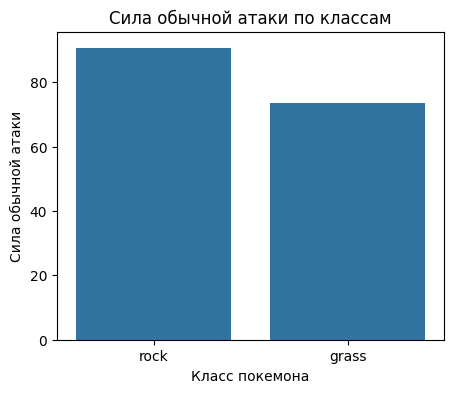

In [ ]:
#визуализация данных
plt.figure(figsize=(5,4))
sns.barplot(x = rock_grass['Class'], y = rock_grass['Attack'], ci = False)
plt.title('Сила обычной атаки по классам')
plt.xlabel('Класс покемона')
plt.ylabel('Сила обычной атаки')
plt.show()

Судя по графику, в силе обычных атак классов rock и grass есть разница. Проверим путем проверки гипотезы. Причем у класса rock сила атаки больше.

In [ ]:
# Проверим равность дисперсий в группах
stat, p = st.levene(rock_d['Attack'],grass_d['Attack'])

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p <0.05:
    print("Отклоняем нулевую гипотезу, вероятно, дисперсия в группах раличается")
else:
    print("Не отклоняем нулевую гипотезу, вероятно, дисперсия в группах одинаковая")

Статистика = 9.25343, p = 0.00277
Отклоняем нулевую гипотезу, вероятно, дисперсия в группах раличается


Т.к. по условиям задачи распределение нормальное, и, дисперсии в группах разные, то можно применить двувыборочный T-тест Стьюдента с поправкой Уэлча

In [ ]:
stat, p = st.ttest_ind(rock.Attack, grass.Attack, equal_var = False) #False - Поправка Уэлча
print(f'Статистика - {stat}, p - {p}')
if p < 0.05:
  print('Отклоняем нулевую гипотезу, средние, вероятно, разные')
else:
  print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')

Статистика - 3.6123310718800608, p - 0.0004125367100834457
Отклоняем нулевую гипотезу, средние, вероятно, разные


In [ ]:
print(f'Сила обычной атаки класса rock {rock_d.Attack.mean()}')
print(f'Сила обычной атаки класса grass {grass_d.Attack.mean()}')

Сила обычной атаки класса rock 90.72413793103448
Сила обычной атаки класса grass 73.46315789473684


Проверка гипотезы также показала, что статистически выборки rock и grass отличаются. Причем среднее значение силы атаки для класса rock больше чем у класса grass.
Вывод: Профессор Оук ошибался.

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос, а правда ли, что покемоны в классе `Water` в среднем быстрее, чем покемоны в классе `Normal`.
    
    
Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: если есть покемоны, которые относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.
</div>

In [ ]:
#создаю копию датафрейма с покемонами класса rock, но не в классе Water
water = pokemon.loc[((pokemon['Class 1'] == 'Water') | (pokemon['Class 2'] == 'Water')) & ((pokemon['Class 1'] != 'Normal') | (pokemon['Class 2'] != 'Normal'))].copy()
water['Class'] = 'water'
water_d = water[['Speed', 'Class']].copy() #cоздаю копию только с нужными столбцами

In [ ]:
#создаю копию датафрейма с покемонами класса grass, но не в классе rock
norm = pokemon.loc[((pokemon['Class 1'] == 'Normal') | (pokemon['Class 2'] == 'Normal')) & ((pokemon['Class 1'] != 'Water') | (pokemon['Class 2'] != 'Water'))].copy()
norm['Class'] = 'normal'
norm_d = norm[['Speed', 'Class']].copy() #cоздаю копию только с нужными столбцами

In [ ]:
water_norm = pd.concat((water_d, norm_d)) #объединяю в один

In [ ]:
water_norm.groupby('Class').count()

,Speed
Class,
normal,102
water,126


In [ ]:
water_d.describe()

,Speed
count,126.000000
mean,64.984127
std,22.664151
min,15.000000
25%,50.000000
50%,65.000000
75%,80.750000
max,122.000000


In [ ]:
norm_d.describe()

,Speed
count,102.000000
mean,72.245098
std,28.286524
min,5.000000
25%,50.000000
50%,71.500000
75%,92.500000
max,135.000000


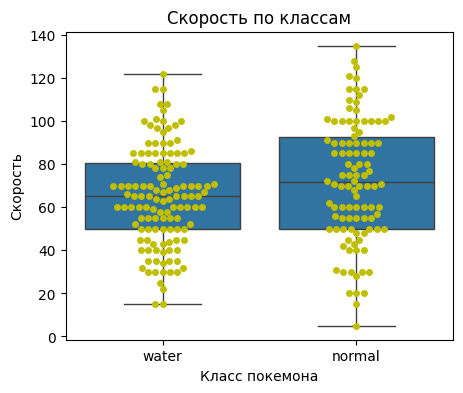

In [ ]:
#Визуализация данных
plt.figure(figsize=(5,4))
sns.boxplot(x = 'Class', y = 'Speed', data = water_norm)
sns.swarmplot(x = 'Class', y = 'Speed', data = water_norm, color = '#BFBF00')
plt.title('Скорость по классам')
plt.xlabel('Класс покемона')
plt.ylabel('Скорость')
plt.show()

Cудя по графику и описательной статистике, выборки разные, но нужно проверить путем проверки гипотезы.

In [ ]:
#проверим имеют ли выборки равную дисперсию
stat, p = st.levene(water_d['Speed'],norm_d['Speed'])

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p <0.05:
    print("Отклоняем нулевую гипотезу, вероятно, дисперсия в группах раличается")
else:
    print("Не отклоняем нулевую гипотезу, вероятно, дисперсия в группах одинаковая")

Статистика = 7.37000, p = 0.00714
Отклоняем нулевую гипотезу, вероятно, дисперсия в группах раличается


Т.к. данные распределены нормально и имеют различную дисперсию, то можно применять критерий двухвыборочный критерий Стьюдента с поправкой Уэлча

In [ ]:
stat, p = st.ttest_ind(water.Speed, norm.Speed, equal_var = False) #False - поправка Уэлча
print(f'Статистика - {stat}, p - {p}')
if p < 0.05:
  print('Отклоняем нулевую гипотезу, средние, вероятно, разные')
else:
  print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')

Статистика - -2.1029882516657676, p - 0.03677337829975771
Отклоняем нулевую гипотезу, средние, вероятно, разные


In [ ]:
print(f'Средняя скорость класса Water {water_d.Speed.mean()}')
print(f'Средняя скорость класса normal {norm_d.Speed.mean()}')

Средняя скорость класса Water 64.98412698412699
Средняя скорость класса normal 72.24509803921569


Т.к. проверка гипотезы показала, что выборки отличаются, а средняя скорость класса Water меньше скорости класса Normal, то профессор Оук опять ошибся - покемоны класса Water в среднем медленнее покемонов класса Normal.

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрёл сыворотку, способную ускорить покемона. Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своём выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

In [ ]:
axel_poks = pokemon.loc[pokemon['Name'].isin(treathed_pokemon) ].copy() # выборка ускоренных покемонов

In [ ]:
axel_poks

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [ ]:
usual_poks = pokemon.loc[~pokemon['Name'].isin(treathed_pokemon) ].copy() # выборка без ускоренных покемонов

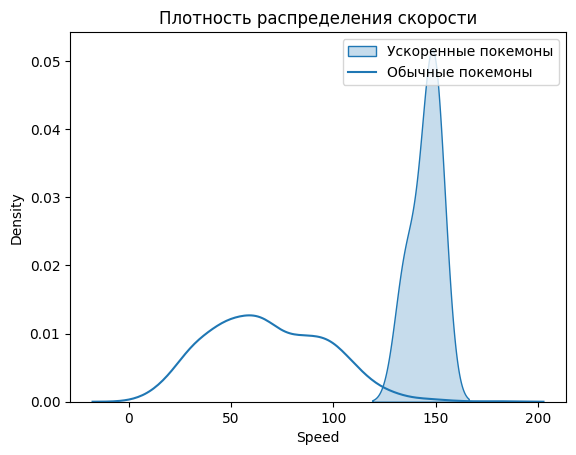

In [ ]:
# визуализация данных
sns.kdeplot(axel_poks.Speed, label = 'Ускоренные покемоны', fill = True)
sns.kdeplot(usual_poks.Speed, label = 'Обычные покемоны')
plt.title('Плотность распределения скорости')
plt.legend(['Ускоренные покемоны', 'Обычные покемоны'], loc = 'best')
plt.show()

Судя по графику эффект от сыворотки есть. Проверим при помощи проверки гипотезы.
Т.к. данные распределены нормально, то применим одновыборочный тест Стьюдента. Сравниваем значения скорости ускоренных покемонов со средней скоростью остальных

In [ ]:
stat, p = st.ttest_1samp(a = axel_poks['Speed'], popmean = usual_poks['Speed'].mean())
print(f'Статистика = {stat:.3f}, p = {p:.6f}')

if p < 0.05:
    print('Отклоняем нулевую гипотзу, вероятно, выборки различаются')
else:
    print('Не отклоняем нулевую гипотезу, вероятно, выборки не отличаются')

Статистика = 21.809, p = 0.000211
Отклоняем нулевую гипотзу, вероятно, выборки различаются


Молодец профессор Оук, хорошую сыворотку изобрел! Хорошо бы еще было чтобы побочек от нее не было.

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов?

А произведение этих же параметров?

Найдите ответы на эти вопросы и убедите всех в своём выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
#создаю копию датафрейма с легендарными покемонами
legend = pokemon.loc[pokemon['Legendary'] == True].copy()
legend['Legendary'] = 'Legendary'
legend['Sum'] = legend[['HP', 'Attack', 'Defense']].sum(axis = 1) # Формирую столбцы с проверяемыми значениями
legend['Prod'] = legend[['HP', 'Attack', 'Defense']].prod(axis = 1)

In [ ]:
legend[['Sum', 'Prod']].describe()

,Sum,Prod
count,65.000000,6.500000e+01
mean,309.076923,1.085942e+06
std,46.429822,5.169911e+05
min,230.000000,1.800000e+05
25%,275.000000,6.885000e+05
50%,305.000000,1.000000e+06
75%,340.000000,1.350000e+06
max,440.000000,2.880000e+06


In [ ]:
#создаю копию датафрейма с обычными покемонами
common = pokemon.loc[pokemon['Legendary'] == False].copy()
common['Legendary'] = 'Common'
common['Sum'] = common[['HP', 'Attack', 'Defense']].sum(axis = 1) # Формирую столбцы с проверяемыми значениями
common['Prod'] = common[['HP', 'Attack', 'Defense']].prod(axis = 1)

In [ ]:
common[['Sum', 'Prod']].describe()

,Sum,Prod
count,735.000000,7.350000e+02
mean,214.410884,4.250414e+05
std,64.359599,3.713542e+05
min,55.000000,2.500000e+03
25%,165.000000,1.512250e+05
50%,213.000000,3.315000e+05
75%,258.000000,5.735375e+05
max,440.000000,2.460000e+06


In [ ]:
#объединяю в один датафрейм и убираю лишние столбцы
comm_leg = pd.concat((legend, common))
comm_leg = comm_leg[['Legendary', 'Sum', 'Prod']] # оставляю только нужные столбцы

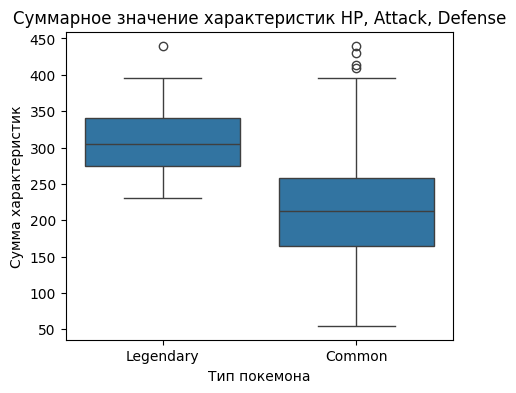

In [ ]:
#Визуализация данных
plt.figure(figsize=(5,4))
sns.boxplot(x = 'Legendary', y = 'Sum', data = comm_leg)
plt.title('Суммарное значение характеристик HP, Attack, Defense')
plt.xlabel('Тип покемона')
plt.ylabel('Сумма характеристик')
plt.show()

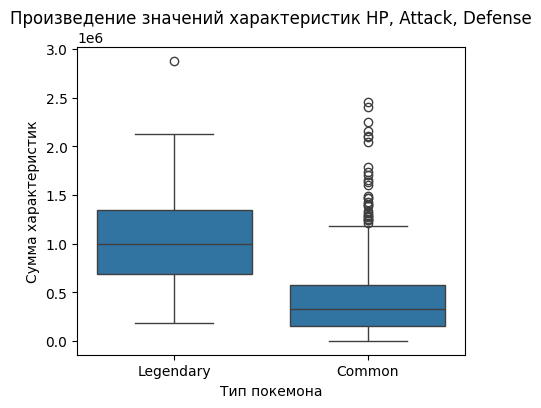

In [ ]:
#Визуализация данных
plt.figure(figsize=(5,4))
sns.boxplot(x = 'Legendary', y = 'Prod', data = comm_leg)
plt.title('Произведение значений характеристик HP, Attack, Defense')
plt.xlabel('Тип покемона')
plt.ylabel('Сумма характеристик')
plt.show()

Судя по графикам и описательной статистике сумма и произведение характеристик у редких покемонов действительно больше чем у обычных.                   
Проверим это при помощи двухвыборочного t теста Стьюдента.

In [ ]:
#для суммы характеристик
stat_s, p_s = st.ttest_ind(legend.Sum, common.Sum, equal_var = False) #False - поправка Уэлча
print(f'Для суммы характеристик статистика - {stat_s}, p - {p_s}')
if p_s < 0.05:
  print('Отклоняем нулевую гипотезу, средние, вероятно, разные')
else:
  print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')

#для произведения характеристик
stat_p, p_p = st.ttest_ind(legend.Prod, common.Prod, equal_var = False) #False - поправка Уэлча
print(f'Для произведения характеристик статистика - {stat_p}, p - {p_p}')
if p_p < 0.05:
  print('Отклоняем нулевую гипотезу, средние, вероятно, разные')
else:
  print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')

Для суммы характеристик статистика - 15.19759110757148, p - 2.9282718703329855e-26
Отклоняем нулевую гипотезу, средние, вероятно, разные
Для произведения характеристик статистика - 10.079078507434385, p - 2.895038880907388e-15
Отклоняем нулевую гипотезу, средние, вероятно, разные


In [ ]:
print(f'Сумма характеристик HP, Attack, Defense для легендарных покемонов {legend.Sum.mean():.2f}')
print(f'Сумма характеристик HP, Attack, Defense для обычных покемонов {common.Sum.mean():.2f}')
print('\n')
print(f'Произведение характеристик HP, Attack, Defense для легендарных покемонов {legend.Prod.mean():.2f}')
print(f'Произведение характеристик HP, Attack, Defense для обычных покемонов {common.Prod.mean():.2f}')

Сумма характеристик HP, Attack, Defense для легендарных покемонов 309.08
Сумма характеристик HP, Attack, Defense для обычных покемонов 214.41


Произведение характеристик HP, Attack, Defense для легендарных покемонов 1085941.62
Произведение характеристик HP, Attack, Defense для обычных покемонов 425041.39


Т.к. проверка гипотез показала, что выборки с зарактеристиками для редких покемонов статистически отличаются от выборок для обычных покемонов, и средние значения редких покемонов больше чем у обычных, то можно сделать вывод, что профессор может быть уверен в превосходстве релких покемонов над обычными в части сравниваемых характеристик.

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боёв Оук выделил четыре класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`.

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Всё та же статистика вам в помощь!
   

Вы можете предположить, что распределение параметров защитных характеристик является нормальным для всех классов покемонов.

</div>

In [ ]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [ ]:
pokemon.head(1)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False


In [ ]:
#создаю датафрейм с покемонами из класса rock и присваиваю им общий признак
rock = pokemon.loc[
    ((pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')) &
     (~(pokemon['Class 1'].isin(['Ground', 'Steel', 'Ice'])) |~(pokemon['Class 2'].isin(['Ground', 'Steel', 'Ice'])))
    ].copy()
rock['Class'] = 'rock'

ground = pokemon.loc[
    ((pokemon['Class 1'] == 'Ground') | (pokemon['Class 2'] == 'Ground')) &
     (~(pokemon['Class 1'].isin(['Rock', 'Steel', 'Ice'])) |~(pokemon['Class 2'].isin(['Rock', 'Steel', 'Ice'])))
    ].copy()
ground['Class'] = 'ground'

steel = pokemon.loc[
    ((pokemon['Class 1'] == 'Steel') | (pokemon['Class 2'] == 'Steel')) &
     (~(pokemon['Class 1'].isin(['Rock', 'Ground', 'Ice'])) |~(pokemon['Class 2'].isin(['Rock', 'Ground', 'Ice'])))
    ].copy()
steel['Class'] = 'steel'

ice = pokemon.loc[
    ((pokemon['Class 1'] == 'Ice') | (pokemon['Class 2'] == 'Ice')) &
     (~(pokemon['Class 1'].isin(['Rock', 'Ground', 'Steel'])) |~(pokemon['Class 2'].isin(['Rock', 'Ground', 'Steel'])))
    ].copy()
ice['Class'] = 'ice'

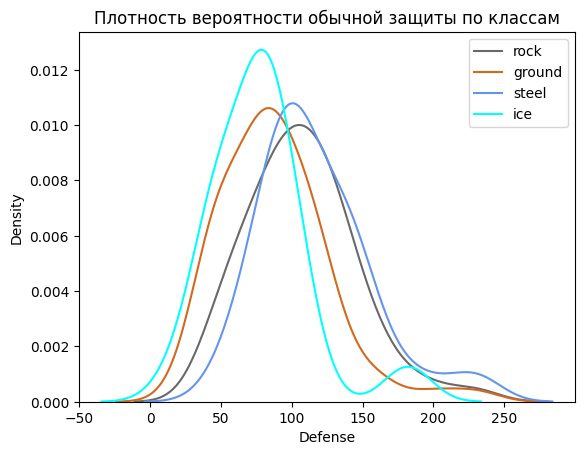

In [ ]:
#визуализация данных
sns.kdeplot(rock.Defense, color = '#696969')
sns.kdeplot(ground.Defense, color = '#D2691E')
sns.kdeplot(steel.Defense, color = '#6495ED')
sns.kdeplot(ice.Defense, color = '#00FFFF')
plt.title('Плотность вероятности обычной защиты по классам')
plt.legend(['rock', 'ground', 'steel', 'ice'], loc = 'best')
plt.show()

В данном случае по графику сложно сказать что-то определенное.       
Статистическую равность или разность выборок проверим при помощи однофакторного дисперсионного анализа, т.к. выборок 4 шт.
Перед этим проверим равность дисперсий

In [ ]:
stat, p = st.levene(rock.Defense, ground.Defense, steel.Defense, ice.Defense)
print(f'Статистика {stat}, p {p}')
if p < 0.05:
  print(f'Отклоняем нулевую гипотезу, вероятно, вариации разные')
else:
  print(f'Принимаем нулевую гипотезу, вероятно, вариации равны')

Статистика 0.4857485531978299, p 0.6925442806007638
Принимаем нулевую гипотезу, вероятно, вариации равны


In [ ]:
fvalue, pvalue = st.f_oneway(rock.Defense, ground.Defense, steel.Defense, ice.Defense)
print(f'Статистика f-value {fvalue:.5f}, статистика p-value {fvalue:.5f}')
if pvalue < 0.05:
  print('Отклоняем нулевую гипотезу, вероятно средние различаются')
else:
  print('Принимаем нулевую гипотезу, вероятно средние одинаковые')

Статистика f-value 10.82012, статистика p-value 10.82012
Отклоняем нулевую гипотезу, вероятно средние различаются


Тест показал, что какие то из выборок различаются.      
Проверим при помощи критерия Тьюки

In [ ]:
#объединяю в один датафрейм для передачи в метод криерия Тьюки, оставляю только информативные столбцы
four_groups = pd.concat((rock[['Defense', 'Class']], ground[['Defense', 'Class']], steel[['Defense', 'Class']], ice[['Defense', 'Class']]))

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
tukey = pairwise_tukeyhsd(endog = four_groups['Defense'].values,
                          groups = four_groups['Class'],
                          alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
ground    ice -11.0436 0.4746 -30.8773  8.7901  False
ground   rock  19.3847 0.0235   1.8684  36.901   True
ground  steel  28.9108 0.0004  10.5525  47.269   True
   ice   rock  30.4283 0.0008  10.0453 50.8113   True
   ice  steel  39.9544    0.0  18.8434 61.0653   True
  rock  steel    9.526 0.5627  -9.4244 28.4764  False
-----------------------------------------------------


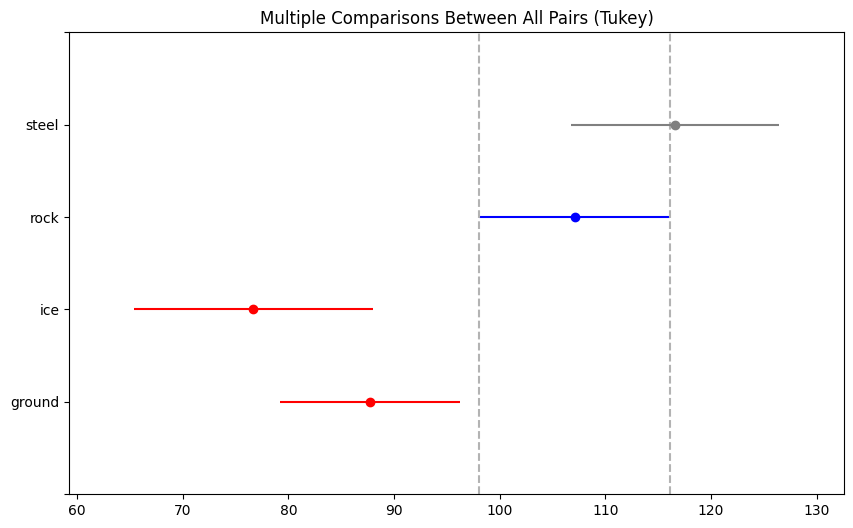

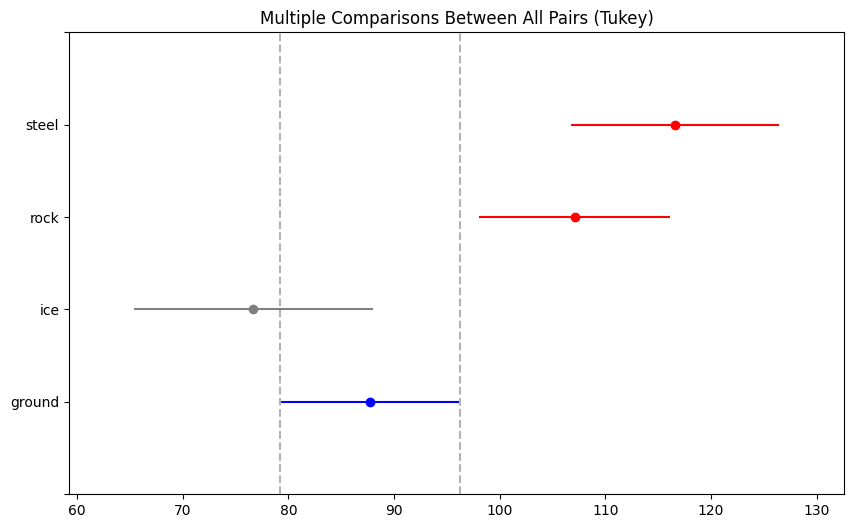

In [ ]:
tukey.plot_simultaneous(comparison_name='rock')
tukey.plot_simultaneous(comparison_name='ground')
plt.show()

Проверка гипотеза показала, что профессор Оук несколько ошибался насчет равности всех 4-х классов между собой по силе прямой защиты.      
Статистически не различаются между собой только классы ice, ground и steel, rock.